In [1]:
import json
from transformers import AutoModelForCausalLM, AutoTokenizer
import numpy as np

from pos_tagger import PosTagger
from attention_extraction import extract_all_attention, get_causal_selfattention_pattern
from data_handling import load_tinystories_data
from plotting import plot_probe_results_from_tag, plot_idx_of_highest_output, plot_selfattention_from_idx

data = load_tinystories_data('../data/tinystories_val.txt')


model_url = 'roneneldan/TinyStories-1M'

model = AutoModelForCausalLM.from_pretrained(model_url, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_url)

pos_tagger = PosTagger(tokenizer)

with open('../probe-results/results_keys.json', 'r') as file:
    results_key = json.load(file) 

with open('../probe-results/results_queries.json', 'r') as file:
    results_query = json.load(file) 

c:\Users\Bruger\Code\mechinterp\mechinterp\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


In [2]:
folder = '../figures/case_studies/prenoun_heads/'

## At The, His, Her (pre-noun)

layer 5, head 13 is active before a definite noun (after the, his, her) and attends back to previous nouns.

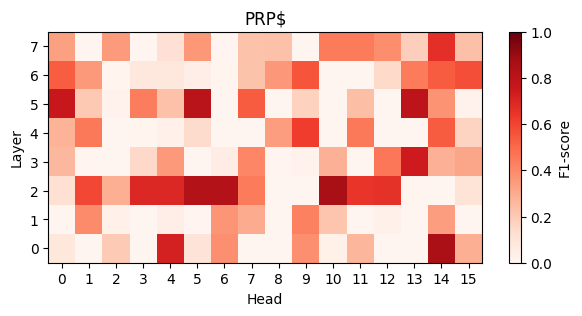

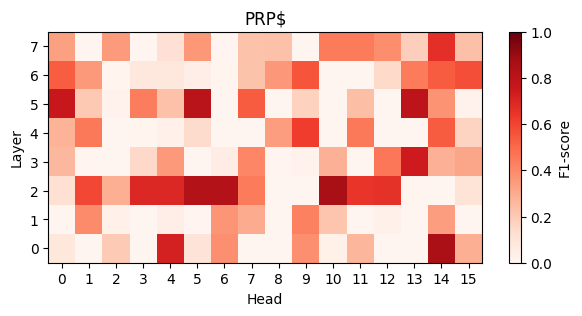

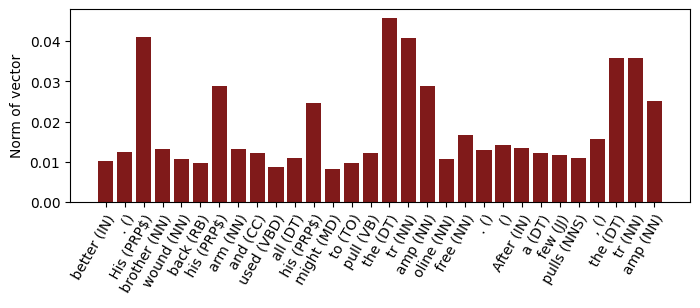

In [3]:
layer = 5
head = 5
input = data[920]

plot_probe_results_from_tag(results_query, 'PRP$', cmap='Reds', outfile=folder+'prp_probes.pdf')
plot_probe_results_from_tag(results_query, 'PRP$', cmap='Reds', outfile=folder+'prp_probes.png')

top_idx, fig, axs = plot_idx_of_highest_output(model, tokenizer, input, layer, head, pos_tagger, color=(0.5, 0.1, 0.1))

In [4]:
axs.get_xticklabels()

[Text(0, 0, ' better (IN)'),
 Text(1, 0, '. ()'),
 Text(2, 0, ' His (PRP$)'),
 Text(3, 0, ' brother (NN)'),
 Text(4, 0, ' wound (NN)'),
 Text(5, 0, ' back (RB)'),
 Text(6, 0, ' his (PRP$)'),
 Text(7, 0, ' arm (NN)'),
 Text(8, 0, ' and (CC)'),
 Text(9, 0, ' used (VBD)'),
 Text(10, 0, ' all (DT)'),
 Text(11, 0, ' his (PRP$)'),
 Text(12, 0, ' might (MD)'),
 Text(13, 0, ' to (TO)'),
 Text(14, 0, ' pull (VB)'),
 Text(15, 0, ' the (DT)'),
 Text(16, 0, ' tr (NN)'),
 Text(17, 0, 'amp (NN)'),
 Text(18, 0, 'oline (NN)'),
 Text(19, 0, ' free (NN)'),
 Text(20, 0, '. ()'),
 Text(21, 0, '  ()'),
 Text(22, 0, ' After (IN)'),
 Text(23, 0, ' a (DT)'),
 Text(24, 0, ' few (JJ)'),
 Text(25, 0, ' pulls (NNS)'),
 Text(26, 0, ', ()'),
 Text(27, 0, ' the (DT)'),
 Text(28, 0, ' tr (NN)'),
 Text(29, 0, 'amp (NN)')]

In [5]:
for lab in axs.get_xticklabels():
    if lab.get_position()[0] in {2, 6, 11, 15, 16, 17, 27, 28, 28}:
        lab.set_fontweight('bold')
        lab.set_fontsize(10)
    else:
        lab.set_fontsize(10)


fig.savefig(folder + 'quote_activity.pdf', bbox_inches='tight')
fig.savefig(folder + 'quote_activity.png', bbox_inches='tight')

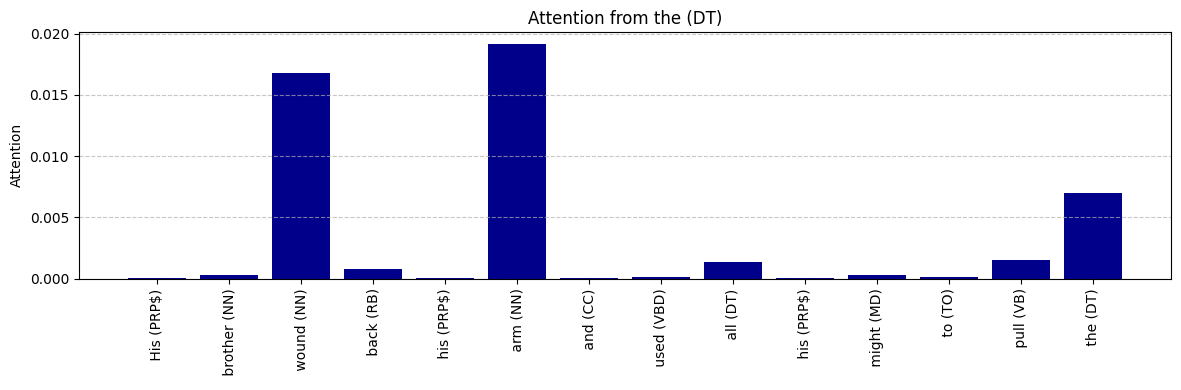

In [6]:


keys, queries, values = extract_all_attention(model, tokenizer, input)
attention = get_causal_selfattention_pattern(keys[layer][head], queries[layer][head])
tokens, tags, words = pos_tagger.tag_input(input, return_words=True)



fig, axs = plot_selfattention_from_idx(attention, words, tags, top_idx, 14, color=(0.1, 0.2, 0.5))

In [7]:
axs.get_xticklabels()

[Text(0, 0, ' His (PRP$)'),
 Text(1, 0, ' brother (NN)'),
 Text(2, 0, ' wound (NN)'),
 Text(3, 0, ' back (RB)'),
 Text(4, 0, ' his (PRP$)'),
 Text(5, 0, ' arm (NN)'),
 Text(6, 0, ' and (CC)'),
 Text(7, 0, ' used (VBD)'),
 Text(8, 0, ' all (DT)'),
 Text(9, 0, ' his (PRP$)'),
 Text(10, 0, ' might (MD)'),
 Text(11, 0, ' to (TO)'),
 Text(12, 0, ' pull (VB)'),
 Text(13, 0, ' the (DT)')]

In [8]:
for lab in axs.get_xticklabels():
    if lab.get_position()[0] in {2, 5}:
        lab.set_fontweight('bold')
        lab.set_fontsize(10)
    else:
        lab.set_fontsize(10)


fig.savefig(folder + 'quote_attention.pdf', bbox_inches='tight')
fig.savefig(folder + 'quote_attention.png', bbox_inches='tight')